## Regulatory Compliance Analysis

This notebook analyzes Thessaloniki's short-term rental licensing compliance 
patterns to identify regulatory framework effectiveness and concentration risks. H and how many do Airbnb continue to advertise and profit from?

### Regulatory Background
- **Regular Licenses:** Standard operating permits (required for most properties)
- **Exempt Status:** Policy exemptions for specific property categories
- **Duplicate Licenses:** Single license shared across multiple properties
- **NA/Missing:** Properties operating without clear licensing status

### Question
How many listings are unlicensed or fadfely claiming exemptions? Is the licensing system achieving its policy objectives of equitable market access while preventing operator concentration?

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = Path.cwd().parent / "data" / "processed"
df = pd.read_parquet(data_path / "listings_cleaned.parquet")
pd.set_option('display.float_format', '{:,.2f}'.format)
df.shape

(4817, 47)

In [2]:
na_mask = df["license"].isna()
dupli_mask = df["license"].duplicated(keep=False) & df["license"].notna() & (df["license"] != "exempt")
exempt_mask = df["license"] == "exempt"

na_df = df[na_mask]
dupli_df = df[dupli_mask]
exempt_df = df[exempt_mask]
non_regular_df = pd.concat([na_df, dupli_df, exempt_df])
df_regular = df.drop(index=non_regular_df.index)

In [3]:
print(f"Licensed listings percentage: {100 * (1 - na_mask.mean()):.2f}%")
print(f"Duplicate license listings percentage: {100 * dupli_mask.mean():.2f}%")
print(f"Exempt license listings percentage: {100 * exempt_mask.mean():.2f}%")
print(f"Regular licensed listings percentage: {100 * (1 - non_regular_df.shape[0] / df.shape[0]):.2f}%")

Licensed listings percentage: 99.44%
Duplicate license listings percentage: 7.68%
Exempt license listings percentage: 0.85%
Regular licensed listings percentage: 90.91%


### NA licenses

In [3]:
na_df.shape

(27, 47)

<Axes: >

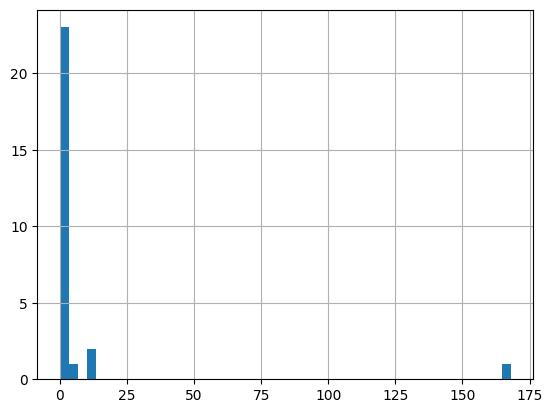

In [5]:
na_df.estimated_occupancy_l365d.hist(bins=50)

In [20]:
na_df.loc[na_df["estimated_occupancy_l365d"] != 0].shape[0]

4

In [5]:
interesting_host_id = na_df.loc[na_df["estimated_revenue_l365d"].idxmax()]["host_id"]
df.loc[df["host_id"] == interesting_host_id][["host_total_listings_count", "price",
                                              "number_of_reviews_ltm", "estimated_revenue_l365d"]].describe()

,host_total_listings_count,price,number_of_reviews_ltm,estimated_revenue_l365d
count,0.00,26.00,28.00,26.00
mean,<NA>,68.69,10.86,"4,148.77"
std,<NA>,26.97,6.78,"2,939.84"
min,<NA>,38.00,0.00,0.00
25%,<NA>,50.00,6.00,"1,971.00"
50%,<NA>,62.00,11.00,"3,555.00"
75%,<NA>,75.00,14.25,"6,145.50"
max,<NA>,133.00,28.00,"12,096.00"


In [19]:
df.loc[df["host_id"] == interesting_host_id].shape[0]

28

In [6]:
df.loc[df["host_id"] == interesting_host_id, "Host_Category"] = 'Large Multi (4+)'

In [16]:
na_df["first_review"].sort_values(ascending=False).head(5)

532    2025-06-14
753    2025-04-09
579    2021-06-08
969    2020-02-10
769    2019-07-14
Name: first_review, dtype: object

In [23]:
na_df.loc[na_df["last_review"] > "2023-01-01"].shape[0]

4

* Apart from 4 listings that seem currently active, all the rest seem like deactivated listings
* An interesting finding is one host that has 28 active listings but is not categorized as a multi host due to missing data

### Exempt Licenses

In [31]:
exempt_df.shape

(41, 47)

In [30]:
exempt_df["property_type"].value_counts().head(10)

property_type
Entire rental unit             19
Entire condo                   11
Private room in guest suite     4
Private room in condo           2
Private room in rental unit     2
Entire serviced apartment       1
Entire home                     1
Camper/RV                       1
Room in hotel                   0
Room in boutique hotel          0
Name: count, dtype: int64

In [18]:
exempt_df["host_location"].value_counts()

host_location
Thessaloniki, Greece       13
Belgrade, Serbia           12
London, United Kingdom      6
Novi Sad, Serbia            1
Athens, Greece              1
Łódź, Poland                1
Skopje, North Macedonia     1
Name: count, dtype: int64

In [32]:
exempt_df["host_id"].value_counts()

host_id
HOST_5CBB76    12
HOST_195D33     5
HOST_5A66C8     3
HOST_415740     2
HOST_C42CEA     2
HOST_4A9C4A     1
HOST_CB8B8B     1
HOST_55A5CA     1
HOST_6A55AA     1
HOST_4AE6F3     1
HOST_4AED84     1
HOST_42A087     1
HOST_4A9714     1
HOST_CD009F     1
HOST_A9304D     1
HOST_68CAF6     1
HOST_553961     1
HOST_A50F41     1
HOST_0AEB81     1
HOST_400940     1
HOST_F2C652     1
HOST_44DB4F     1
Name: count, dtype: int64

Geographically -  most buildings next to ataturk museum and german colnsulate (προξενειο)  
Property types - A couple of listings might be eligible for exemption, but the majority are regular rental units.  
Year-round availability - Regular, no very short short day availability
host analysis - 5 host with more than 1 exemptions, especially one has ~30% of all exemptions.Most of them are not greek
property names - not suggestive of hotels or motels
a particular host has almost identical listigs only with small number  differences in the listing name



In [33]:
exempt_df["availability_365"].min()

np.int64(54)

In [20]:
exempt_df.iloc[exempt_df["availability_365"].argmin()]

id                                                PROP_3A433E
name                                     Κο - Priv - Pr #0010
host_id                                           HOST_F2C652
host_since                                2017-10-20 00:00:00
host_location                            Thessaloniki, Greece
host_response_time                             within an hour
host_response_rate                                       100%
host_acceptance_rate                                     0.82
host_is_superhost                                        True
host_total_listings_count                                   4
host_identity_verified                                   True
neighbourhood                  Kalamaria Municipality, Greece
neighbourhood_cleansed                              Kalamaria
latitude                                                40.57
longitude                                               22.96
property_type                     Private room in rental unit
room_typ

In [34]:
exempt_df.loc[exempt_df["host_is_superhost"] == True]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
13,PROP_01A228,Kr - Enti - En #0004,HOST_4A9C4A,NaT,None,None,None,NaN,True,<NA>,...,5.00,5.00,5.00,5.00,4.00,5.00,exempt,True,0.01,nan
1911,PROP_3A433E,Κο - Priv - Pr #0010,HOST_F2C652,2017-10-20,"Thessaloniki, Greece",within an hour,100%,0.82,True,4,...,4.82,4.87,4.68,4.84,4.71,4.87,exempt,False,1.35,Large Multi (4+)
3387,PROP_E650E6,Sa - Enti - En #1252,HOST_553961,2021-06-05,None,within an hour,100%,0.97,True,1,...,4.85,4.96,4.81,4.88,4.42,4.92,exempt,False,2.21,Individual (1)
4279,PROP_08A539,Fe - Priv - Pr #0044,HOST_A9304D,2022-09-27,"Athens, Greece",within a few hours,100%,0.94,True,2,...,5.00,5.00,4.75,5.00,4.50,4.50,exempt,False,1.01,Small Multi (2-3)


In [22]:
exempt_df.sort_values(by="estimated_revenue_l365d", ascending=False).head(10)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
3387,PROP_E650E6,Sa - Enti - En #1252,HOST_553961,2021-06-05,None,within an hour,100%,0.97,True,1,...,4.85,4.96,4.81,4.88,4.42,4.92,exempt,False,2.21,Individual (1)
3680,PROP_C2EB2E,El - Enti - En #2089,HOST_195D33,2022-07-20,"London, United Kingdom",within an hour,100%,1.00,False,10,...,4.86,4.43,4.43,4.57,4.57,4.57,exempt,True,0.82,Large Multi (4+)
1911,PROP_3A433E,Κο - Priv - Pr #0010,HOST_F2C652,2017-10-20,"Thessaloniki, Greece",within an hour,100%,0.82,True,4,...,4.82,4.87,4.68,4.84,4.71,4.87,exempt,False,1.35,Large Multi (4+)
2331,PROP_66AADD,St - Enti - En #0943,HOST_195D33,2022-07-20,"London, United Kingdom",within an hour,100%,1.00,False,10,...,4.48,4.05,4.71,4.52,4.71,4.24,exempt,True,0.92,Large Multi (4+)
3500,PROP_1E6E37,Su - Priv - Pr #0026,HOST_C42CEA,2017-04-01,"Thessaloniki, Greece",within an hour,100%,1.00,False,5,...,4.90,4.50,4.60,4.60,4.80,4.80,exempt,True,1.12,Large Multi (4+)
3456,PROP_2FA2CB,St - Enti - En #1950,HOST_195D33,2022-07-20,"London, United Kingdom",within an hour,100%,1.00,False,10,...,4.50,4.00,4.83,4.33,4.67,4.17,exempt,True,0.62,Large Multi (4+)
3455,PROP_BDF616,St - Enti - En #1949,HOST_195D33,2022-07-20,"London, United Kingdom",within an hour,100%,1.00,False,10,...,4.80,3.80,5.00,4.20,4.60,4.40,exempt,True,0.50,Large Multi (4+)
4279,PROP_08A539,Fe - Priv - Pr #0044,HOST_A9304D,2022-09-27,"Athens, Greece",within a few hours,100%,0.94,True,2,...,5.00,5.00,4.75,5.00,4.50,4.50,exempt,False,1.01,Small Multi (2-3)
4725,PROP_C98CE1,ex - Enti - En #2864,HOST_55A5CA,2024-07-03,None,within an hour,100%,0.83,False,2,...,5.00,5.00,5.00,5.00,5.00,5.00,exempt,False,1.00,Small Multi (2-3)
2939,PROP_03CCDE,Pr - Enti - En #1613,HOST_195D33,2022-07-20,"London, United Kingdom",within an hour,100%,1.00,False,10,...,4.64,4.00,4.82,4.82,4.36,4.45,exempt,True,0.71,Large Multi (4+)


<hr>

### percentage of licenced listings

In [ ]:
na_mask = ls["license"].isna()
dupli_mask = ls["license"].duplicated(keep=False) & ls["license"].notna() & (ls["license"] != "exempt")
exempt_mask = ls["license"] == "exempt"

na_df = ls[na_mask]
dupli_df = ls[dupli_mask]
exempt_df = ls[exempt_mask]
non_regular_df = pd.concat([na_df, dupli_df, exempt_df])



In [14]:
exempt_df.shape, dupli_df.shape, na_df.shape

((41, 47), (370, 47), (27, 47))

In [15]:
non_regular_df.shape

(438, 47)

In [ ]:
non_regular_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
14,PROP_01A2,Kr - Enti - En #0004,HOST_4A9C,NaT,None,None,None,NaN,True,<NA>,...,5.00,5.00,5.00,5.00,5.00,4.00,5.00,exempt,True,0.01
883,PROP_B710,Wa - Camp - En #0003,HOST_68CA,2013-06-10,"Novi Sad, Serbia",within a few hours,80%,0.51,False,41,...,4.71,4.71,4.29,4.86,4.86,5.00,4.43,exempt,False,0.11
1462,PROP_8119,Un - Enti - En #0485,HOST_5CBB,2021-11-25,"Belgrade, Serbia",within a day,63%,0.34,False,56,...,4.67,5.00,4.33,5.00,5.00,5.00,5.00,exempt,False,0.08
1468,PROP_4FFC,Un - Enti - En #0489,HOST_5CBB,2021-11-25,"Belgrade, Serbia",within a day,63%,0.34,False,56,...,3.50,3.00,3.50,3.00,4.00,4.50,3.00,exempt,False,0.23
1471,PROP_FAF0,Un - Enti - En #0491,HOST_5CBB,2021-11-25,"Belgrade, Serbia",within a day,63%,0.34,False,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,exempt,False,NaN


In [14]:
dupli_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
4,PROP_C0E0,Kr - Enti - En #0001,HOST_4A9C,NaT,None,None,None,NaN,True,<NA>,...,4.30,4.20,4.50,4.80,5.00,4.50,4.10,LIC_90F363,True,0.06
8,PROP_C136,Kr - Enti - En #0002,HOST_4A9C,NaT,None,None,None,NaN,True,<NA>,...,4.83,4.78,4.83,5.00,4.89,4.78,4.83,LIC_90F363,True,0.18
10,PROP_906D,Kr - Enti - En #0006,HOST_4A9C,NaT,None,None,None,NaN,True,<NA>,...,4.50,4.50,4.50,5.00,4.50,4.17,4.50,LIC_90F363,True,0.07
13,PROP_5B24,Kr - Enti - En #0003,HOST_4A9C,NaT,None,None,None,NaN,True,<NA>,...,4.67,4.56,4.44,4.44,4.33,4.75,4.25,LIC_90F363,True,0.10
14,PROP_01A2,Kr - Enti - En #0004,HOST_4A9C,NaT,None,None,None,NaN,True,<NA>,...,5.00,5.00,5.00,5.00,5.00,4.00,5.00,exempt,True,0.01


In [8]:
dupli_df.head()

,id,name,host_id,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
4,550239,Kripis Studio Thessaloniki No1,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Central Macedonia, Greece",...,4.30,4.20,4.50,4.80,5.00,4.50,4.10,1133335,True,0.06
8,1006153,Kripis Studio Thessaloniki No4,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Makedonia Thraki, Greece",...,4.83,4.78,4.83,5.00,4.89,4.78,4.83,1133335,True,0.18
10,1013340,Kripis Studio Thessaloniki No2,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Makedonia Thraki, Greece",...,4.50,4.50,4.50,5.00,4.50,4.17,4.50,1133335,True,0.07
13,1117177,Kripis Studio Thessaloniki No3,1193625,NaT,None,NaN,True,<NA>,None,"Thessaloniki, Makedonia Thraki, Greece",...,4.67,4.56,4.44,4.44,4.33,4.75,4.25,1133335,True,0.10
110,12926477,white tower city center loft,70494327,2016-05-05,"Thessaloniki, Greece",1.00,True,2,True,"Θεσσαλονίκη, Makedonia Thraki, Greece",...,4.71,4.76,4.65,4.86,4.93,4.94,4.71,00001751175,True,4.35


In [42]:
non_regular_index = pd.concat([na_df, dupli_df, exempt_df]).index
ls_regular = ls.drop(index=non_regular_index)
ls_regular.shape

(4379, 47)

In [43]:
ls_regular.to_parquet(data_path / "processed" / "listings_regular_license.parquet", engine="pyarrow", index=False)

In [45]:
ls_regular.shape

(4379, 47)

In [46]:
len(ls_regular)/ len(ls)

0.9090720365372639

<hr>

### Check exempt

In [25]:
exempt_df.loc[[1967, 3479, 2399, 3017, 3594], :].T

,1967,3479,2399,3017,3594
id,783090274620300671,1191193772456362986,931959667193659089,1097954503331571600,1216097156342792505
name,Κοντά στην παραλια της Καλαμαριας,San Marco di Petro Thessaloniki,Stylish Apartment in City Center,Premium Loft In City Center,Sunshine room studio
host_id,155399708,405376667,470648435,470648435,123750052
host_since,2017-10-20 00:00:00,2021-06-05 00:00:00,2022-07-20 00:00:00,2022-07-20 00:00:00,2017-04-01 00:00:00
host_location,"Thessaloniki, Greece",None,"London, United Kingdom","London, United Kingdom","Thessaloniki, Greece"
host_acceptance_rate,0.82,0.97,1.00,1.00,1.00
host_is_superhost,True,True,False,False,False
host_total_listings_count,4,1,10,10,5
host_identity_verified,True,True,True,True,True
neighbourhood,"Kalamaria Municipality, Greece","Thessaloniki, Greece",NaN,NaN,NaN


<hr>

- small acceptance rates  
- few total listings
- higher than average mean price
- very high max value for estimated revenue
- listings with high number of reviews show well established listings
- dates do not show recently created listings

<hr>

### Duplicate licenses

In [62]:
dupli_df.shape

(408, 42)

In [67]:
dupli_df.drop(columns=cols_todrop).describe().T

,count,mean,std,min,25%,50%,75%,max
host_acceptance_rate,362.00,0.82,0.28,0.00,0.71,0.99,1.00,1.00
host_total_listings_count,389.00,167.66,259.57,1.00,6.00,17.00,390.00,"1,038.00"
accommodates,408.00,3.50,2.18,1.00,2.00,3.00,4.00,16.00
bathrooms,365.00,1.14,0.42,0.50,1.00,1.00,1.00,5.50
bedrooms,400.00,1.18,0.86,0.00,1.00,1.00,1.00,7.00
beds,362.00,2.28,2.20,0.00,1.00,2.00,2.00,13.00
price,365.00,83.23,93.25,15.00,46.00,59.00,85.00,972.00
minimum_nights,408.00,3.22,11.41,1.00,1.00,1.00,2.00,180.00
maximum_nights,408.00,493.48,394.83,1.00,360.00,365.00,"1,125.00","1,125.00"
availability_30,408.00,16.28,10.34,0.00,8.00,18.00,26.00,30.00


In [69]:
dupli_df["number_of_reviews"].sort_values(ascending=False).head(10)

1057    361
110     323
748     307
630     219
2071    174
439     172
1286    141
651     132
2605    130
1575    114
Name: number_of_reviews, dtype: int64

In [87]:
dupli_df.head(3).T

,4,8,10
id,550239,1006153,1013340
name,Kripis Studio Thessaloniki No1,Kripis Studio Thessaloniki No4,Kripis Studio Thessaloniki No2
host_id,1193625,1193625,1193625
host_since,NaT,NaT,NaT
host_location,None,None,None
host_acceptance_rate,NaN,NaN,NaN
host_is_superhost,True,True,True
host_total_listings_count,<NA>,<NA>,<NA>
host_identity_verified,None,None,None
neighbourhood,"Thessaloniki, Central Macedonia, Greece","Thessaloniki, Makedonia Thraki, Greece","Thessaloniki, Makedonia Thraki, Greece"


In [85]:
dupli_groupped = dupli_df.groupby(["license"], as_index=False)["host_id"].nunique()
dupli_groupped

,license,host_id
0,00000034433,1
1,00000088496,1
2,00000261506,1
3,00000292013,1
4,00000299700,1
...,...,...
114,1381448,1
115,2665721,1
116,2804865,1
117,2987458,1


In [90]:
dupli_df["location"] = dupli_df["lat_rounded"].astype(str) + "_" + dupli_df["lon_rounded"].astype(str)
dupli_grouped_coor = dupli_df.groupby("license")["location"].nunique()
dupli_grouped_coor

/tmp/ipykernel_1311/3813208614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli_df["location"] = dupli_df["lat_rounded"].astype(str) + "_" + dupli_df["lon_rounded"].astype(str)


license
00000034433    2
00000088496    3
00000261506    4
00000292013    2
00000299700    2
              ..
1381448        1
2665721        2
2804865        2
2987458        1
2987463        1
Name: location, Length: 119, dtype: int64

In [49]:
dupli_df["host_id"].value_counts().head(10)

host_id
239769711    46
260979712    18
433471717    18
461193921    14
6836073      12
111705455    10
204997816     7
119927623     6
129257949     6
281350563     6
Name: count, dtype: int64

In [78]:
dupli_df["property_type"].value_counts().head(10)

property_type
Entire rental unit                   232
Entire condo                          58
Entire serviced apartment             24
Entire home                           19
Room in aparthotel                    13
Camper/RV                             12
Private room in rental unit            9
Private room in bed and breakfast      8
Boat                                   5
Private room in condo                  4
Name: count, dtype: int64

In [53]:
dupli_df["host_location"].value_counts().head(10)

host_location
Thessaloniki, Greece       111
Belgrade, Serbia            18
Heraklion, Greece           14
Novi Sad, Serbia            12
London, United Kingdom       6
Athens, Greece               1
Łódź, Poland                 1
Skopje, North Macedonia      1
Name: count, dtype: int64

- very high host total listings ()
- high estimaded revenue
- check 17 all of his listings have the same name

<hr>

In [24]:
ls.loc[ls["license"].isna(), "host_id"].nunique()

35

In [25]:
ls["license"].isna().sum()

np.int64(36)

In [27]:
ls.loc[ls["license"]=="Exempt", "host_id"].nunique()

17

<hr>

In [ ]:
non_regular_df.to_parquet("../data/processed/listings_non_regular_license.parquet", engine="pyarrow", index=False)


df_regular.to_parquet(data_path / "processed" / "listings_regular_license.parquet", engine="pyarrow", index=False)